Good Morning, Everyone! 🌞
👋 Welcome to the session! I hope you're all doing great and ready to dive into something exciting today.

🎯 Today's Agenda:
We’ll be doing a Logistic Regression Hands-on Session 🧠 — a practical and insightful activity to understand how logistic regression works and how to apply it effectively.

✨ I hope you're as excited as I am!
💬 Please stay active throughout the session and feel free to drop your responses and questions in the chat box.
❓ If you have any doubts at any point, don’t hesitate to ask — I’m here to support you throughout the session.

⏳ We’ll wait for a few more minutes to allow everyone to join in, and then we’ll get started.

R2 score ---  1-SSR/TSS


SSR-sum of squares of residual
TSS---total sum of squares

In [3]:
### import the necessry library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("/content/bank-additional-full (3) (1) (1).csv",sep =";")

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#problem statement
We are working with data from a bank's marketing campaign, where the goal is to determine whether a client will subscribe to a term deposit (y). This is a classification problem with two possible outcomes: yes (subscribed) and no (did not subscribe).

The dataset includes information about clients (like age, job, and marital status), their financial behavior (like loans and housing), and details about the marketing campaign (like contact duration and the number of contacts).

By analyzing these features using logistic regression, we aim to build a model that can predict whether a new client will subscribe to the term deposit based on their profile. This will help the bank target its campaigns more effectively and improve their success rate."

age: Client's age (numeric).

job: Client's job type (categorical).

marital: Client's marital status (categorical).

education: Client's level of education (categorical).

default: Whether the client has credit in default (categorical: "yes"/"no").

housing: Whether the client has a housing loan (categorical: "yes"/"no").

loan: Whether the client has a personal loan (categorical: "yes"/"no").

contact: Type of communication contact (categorical: "cellular", "telephone", etc.).

month: Last contact month of the year (categorical).
day_of_week: Last contact day of the week (categorical).

duration: Last contact duration in seconds (numeric).

campaign: Number of contacts performed during this campaign (numeric).

pdays: Days since the client was last contacted from a previous campaign (numeric, -1 if not previously contacted).

previous: Number of contacts performed before this campaign (numeric).

poutcome: Outcome of the previous marketing campaign (categorical: "success", "failure", etc.).

emp.var.rate: Employment variation rate - quarterly indicator (numeric).

cons.price.idx: Consumer price index - monthly indicator (numeric).

cons.conf.idx: Consumer confidence index - monthly indicator (numeric).

euribor3m: Euribor 3-month rate - daily indicator (numeric).

nr.employed: Number of employees - quarterly indicator (numeric).

y (Target): Whether the client subscribed to a term deposit (binary: "yes" for success, "no" for failure).

In logistic regression, y is the dependent variable, with binary outcomes to predict (e.g., "yes" = 1, "no" = 0).

In [8]:
###check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [9]:
###check the statistical part of info
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
#eda part
#null
#duplicate

In [11]:
df.shape

(41199, 21)

In [12]:
# #30 percent,10 percent
# #at certain cases it is based on size of the data
# if the size of the data is huge then we can remove the null values
#whenever we are haviung more than 30% null values in the data you cant remove the null values

In [13]:
df.isnull().sum()

,0
age,4
job,5
marital,5
education,5
default,4
housing,3
loan,4
contact,4
month,3
day_of_week,3


In [14]:
df.isnull().sum().sum()

np.int64(76)

If you are having more null values and less data size then the optimalmchoice is to replace the datas with mean/median/mode

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum().sum()

np.int64(0)

In [18]:
df.duplicated().sum()

np.int64(13)

In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41177 entries, 0 to 41193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41177 non-null  float64
 1   job             41177 non-null  object 
 2   marital         41177 non-null  object 
 3   education       41177 non-null  object 
 4   default         41177 non-null  object 
 5   housing         41177 non-null  object 
 6   loan            41177 non-null  object 
 7   contact         41177 non-null  object 
 8   month           41177 non-null  object 
 9   day_of_week     41177 non-null  object 
 10  duration        41177 non-null  float64
 11  campaign        41177 non-null  float64
 12  pdays           41177 non-null  float64
 13  previous        41177 non-null  float64
 14  poutcome        41177 non-null  object 
 15  emp.var.rate    41177 non-null  float64
 16  cons.price.idx  41177 non-null  float64
 17  cons.conf.idx   41177 non-null  floa

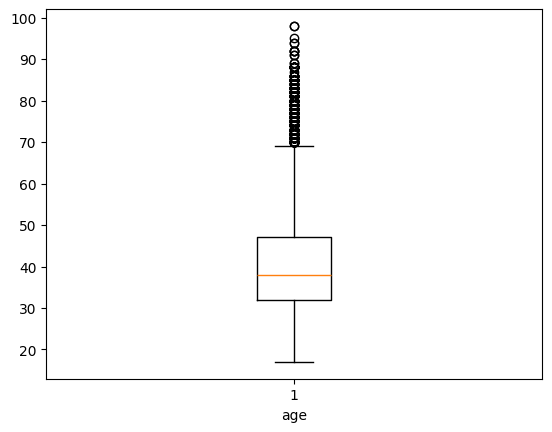

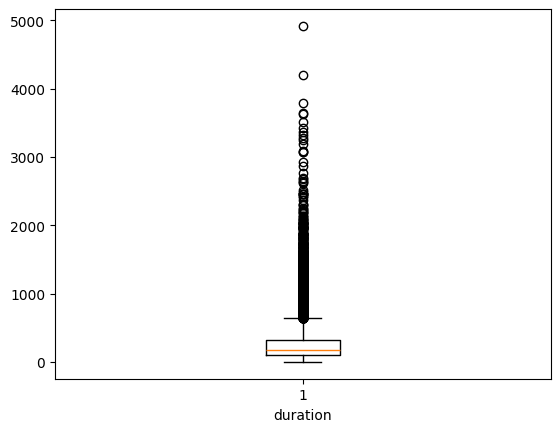

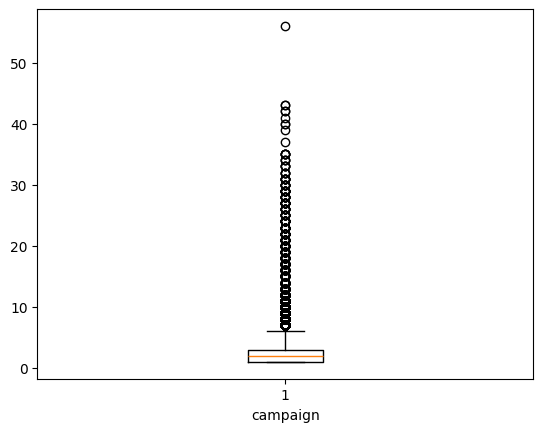

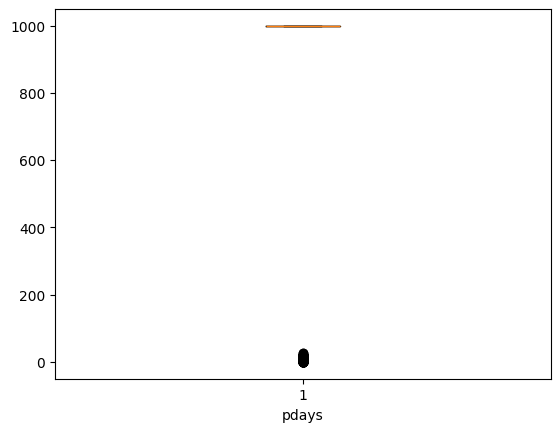

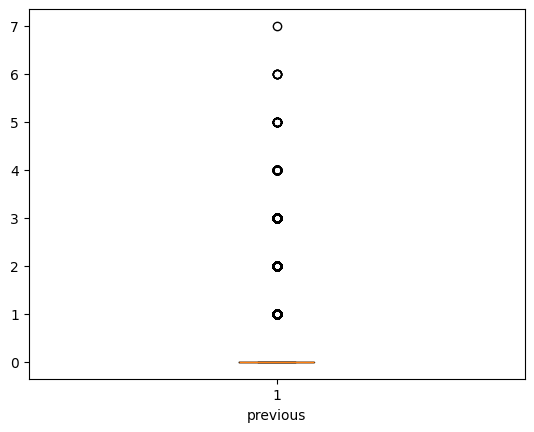

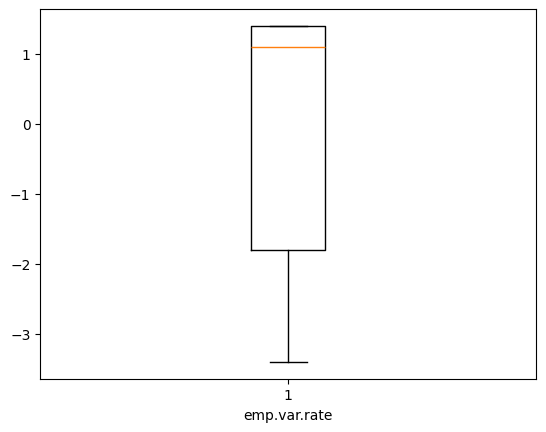

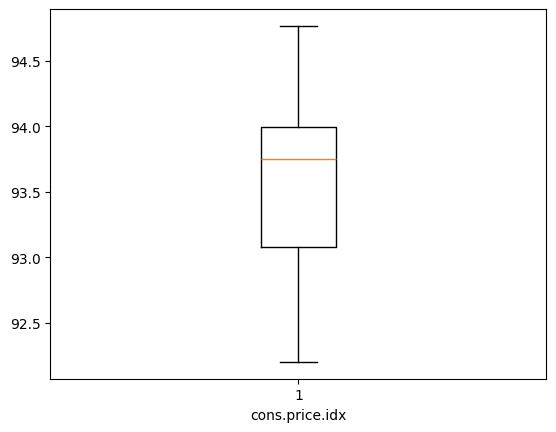

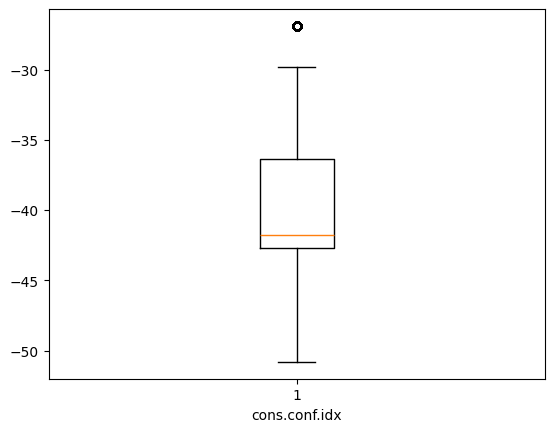

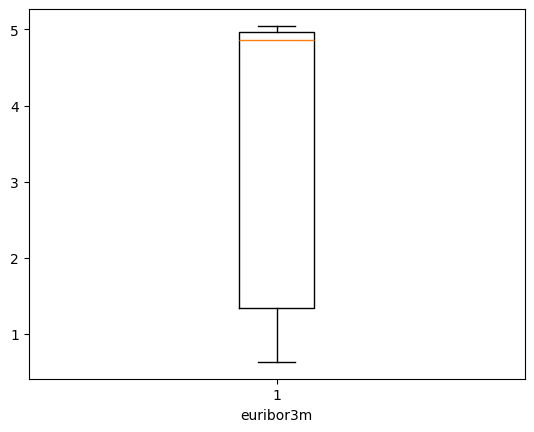

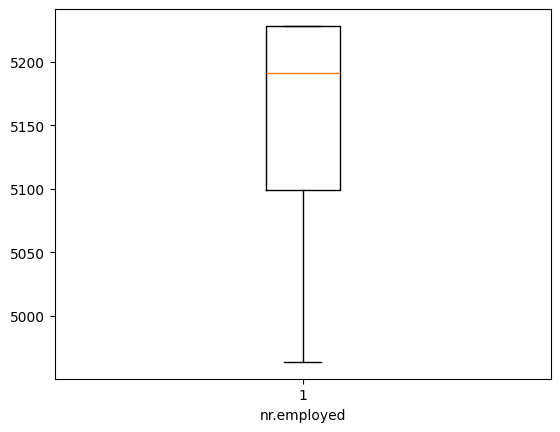

In [21]:
#outliers
for i in df.columns:
  if df[i].dtypes != 'object':
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [ ]:
df.shape

(41177, 21)

In [23]:
### Now apply label encoding for changing the obj to numeric because model cant work on obj data
from sklearn.preprocessing import LabelEncoder

In [24]:
label_mappings = {}

for i in df.columns:
  if df[i].dtype == 'object':
    le = LabelEncoder()
    df[i]= le.fit_transform(df[i])
    label_mappings[i] = dict(zip(le.classes_,le.transform(le.classes_)))
for column, mapping in  label_mappings.items():
  print(f"mapping for {column} : {mapping}")


mapping for job : {'admin.': np.int64(0), 'blue-collar': np.int64(1), 'entrepreneur': np.int64(2), 'housemaid': np.int64(3), 'management': np.int64(4), 'retired': np.int64(5), 'self-employed': np.int64(6), 'services': np.int64(7), 'student': np.int64(8), 'technician': np.int64(9), 'unemployed': np.int64(10), 'unknown': np.int64(11)}
mapping for marital : {'divorced': np.int64(0), 'married': np.int64(1), 'single': np.int64(2), 'unknown': np.int64(3)}
mapping for education : {'basic.4y': np.int64(0), 'basic.6y': np.int64(1), 'basic.9y': np.int64(2), 'high.school': np.int64(3), 'illiterate': np.int64(4), 'professional.course': np.int64(5), 'university.degree': np.int64(6), 'unknown': np.int64(7)}
mapping for default : {'no': np.int64(0), 'unknown': np.int64(1), 'yes': np.int64(2)}
mapping for housing : {'no': np.int64(0), 'unknown': np.int64(1), 'yes': np.int64(2)}
mapping for loan : {'no': np.int64(0), 'unknown': np.int64(1), 'yes': np.int64(2)}
mapping for contact : {'cellular': np.int6

In [25]:
###Model Buildings

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
#split the data
x = df.drop(columns = ['y']) ## here dropping the Y col means except of y all the col will be present because all the columns is in df
y = df['y'] ## here y means only col y

In [32]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44.0,9,1,5,0,0,0,0,7,0,442.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41187,74.0,5,1,5,0,2,0,0,7,0,239.0,3.0,999.0,1.0,0,-1.1,94.767,-50.8,1.028,4963.6


In [33]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41184,0
41185,0
41186,1
41187,0


In [34]:
model = LogisticRegression()

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state =148)

In [36]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7560,48.0,6,1,3,1,2,0,1,6,0,171.0,2.0,999.0,0.0,1,1.1,93.994,-36.4,4.864,5191.0
33671,29.0,9,2,5,0,2,0,0,6,4,231.0,2.0,999.0,0.0,1,-1.8,92.893,-46.2,1.281,5099.1
34977,36.0,9,1,5,0,2,0,0,6,0,157.0,4.0,999.0,0.0,1,-1.8,92.893,-46.2,1.250,5099.1
40479,60.0,1,1,0,0,2,0,0,1,2,176.0,1.0,999.0,1.0,0,-1.7,94.027,-38.3,0.899,4991.6
9831,47.0,4,1,6,0,2,0,1,4,4,181.0,1.0,999.0,0.0,1,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26445,46.0,4,1,7,0,2,0,0,7,2,1503.0,2.0,999.0,0.0,1,-0.1,93.200,-42.0,4.076,5195.8
38362,60.0,5,1,0,0,0,0,0,8,1,98.0,1.0,999.0,0.0,1,-3.4,92.431,-26.9,0.739,5017.5
36797,57.0,5,1,0,0,0,2,0,4,1,292.0,1.0,999.0,0.0,1,-2.9,92.963,-40.8,1.260,5076.2
36712,34.0,0,2,3,0,0,0,0,4,0,548.0,2.0,999.0,0.0,1,-2.9,92.963,-40.8,1.268,5076.2


In [37]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
16405,34.0,0,2,3,0,2,0,0,3,4,271.0,2.0,999.0,0.0,1,1.4,93.918,-42.7,4.963,5228.1
16193,33.0,9,2,5,0,0,0,0,3,3,96.0,2.0,999.0,0.0,1,1.4,93.918,-42.7,4.961,5228.1
7162,36.0,0,2,6,0,0,0,1,6,2,792.0,3.0,999.0,0.0,1,1.1,93.994,-36.4,4.860,5191.0
25375,41.0,0,2,6,0,2,0,0,7,3,105.0,5.0,999.0,1.0,0,-0.1,93.200,-42.0,4.153,5195.8
22672,34.0,0,2,6,0,0,2,0,1,0,78.0,3.0,999.0,0.0,1,1.4,93.444,-36.1,4.964,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,38.0,0,1,6,0,2,0,1,6,0,411.0,3.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
12092,49.0,3,1,0,0,0,2,1,4,0,183.0,2.0,999.0,0.0,1,1.4,94.465,-41.8,4.947,5228.1
21343,44.0,7,1,0,1,2,0,0,1,1,779.0,7.0,999.0,0.0,1,1.4,93.444,-36.1,4.963,5228.1
1868,28.0,7,2,2,1,2,0,1,6,0,294.0,2.0,999.0,0.0,1,1.1,93.994,-36.4,4.855,5191.0


In [38]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred = model.predict(x_test)

In [46]:
from sklearn.metrics import *

In [47]:
accuracy_score(y_pred,y_test)

0.911688521936215

In [48]:
confusion_matrix(y_pred,y_test)

array([[10695,   781],
       [  310,   568]])

In [49]:
10695+568

11263

In [50]:
10695+568+781+310

12354

In [51]:
11263/12354

0.911688521936215

In [52]:
report = classification_report(y_test,y_pred)


In [53]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11005
           1       0.65      0.42      0.51      1349

    accuracy                           0.91     12354
   macro avg       0.79      0.70      0.73     12354
weighted avg       0.90      0.91      0.90     12354

